In [2]:
using OrdinaryDiffEq
using SummationByPartsOperators
#using DifferentialEquations
using Plots
using LinearAlgebra
#using BandedMatrices

In [31]:
N = 800 #grid steps
x_i = 0.0; x_f = 1.0 #region 
dx = (x_f-x_i)/(N-1)
U = 5 #number of fields (f,g,h,χ_+,χ_-)
dT = 0.1*dx
u0 = zeros(N*U)
du = zeros(N*U)

D = derivative_operator(MattssonNordström2004(), derivative_order=1, accuracy_order=4, xmin=x_i, xmax=x_f, N=N)

x = SummationByPartsOperators.grid(D)

Δ = dissipation_operator(D)

SBP 4-derivative dissipation operator of order 2 on a grid in [0.0, 1.0] using 800 nodes 
and coefficients of Mattsson, Svärd, Nordström (2004) 
  Stable and Accurate Artificial Dissipation. 
  Journal of Scientific Computing 21.1, pp. 57-79. 
See also (first and second derivatives) 
  Mattsson, Nordström (2004) 
  Summation by parts operators for finite difference approximations of second 
    derivatives. 
  Journal of Computational Physics 199, pp. 503-540.

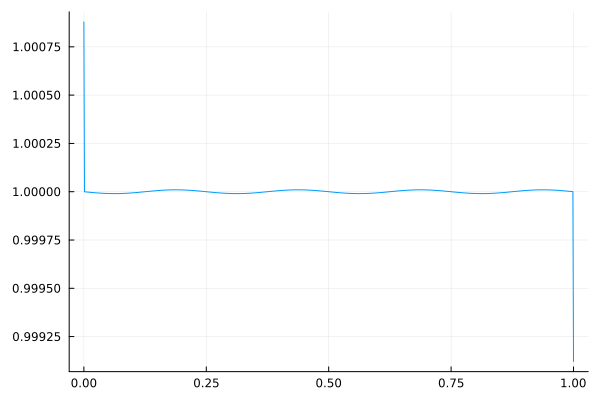

In [44]:
du .= 1.0
f0 = @view u0[1:N]
df = @view du[1:N]
u0 = rand(N*U)
f0 = sin.(2π*4*x)
mul!(df,D,f0,0.0,true)
mul!(df,Δ,f0,10.0,true)

plot(x,df,label="")

In [3]:
D2 = derivative_operator(MattssonNordström2004(), derivative_order=1, accuracy_order=2, xmin=0, xmax=1, N=3)
left_boundary_weight(D2)*2*2

1.0

In [4]:
D4 = derivative_operator(MattssonNordström2004(), derivative_order=1, accuracy_order=4, xmin=0, xmax=1, N=13)
left_boundary_weight(D4)*48/17*(12)
#=
This check is OK to conclude that left_boundary_weight(D4) is just h_{11} (with the dx included, at least for 
the second and fourth order case).
=#

1.0

In [5]:
Matrix(D4)

13×13 Matrix{Float64}:
 -16.9412    20.8235   -2.82353  -1.05882  …   0.0        0.0       0.0
  -6.0        0.0       6.0       0.0          0.0        0.0       0.0
   1.11628   -8.23256   0.0       8.23256      0.0        0.0       0.0
   0.367347   0.0      -7.22449   0.0          0.0        0.0       0.0
   0.0        0.0       1.0      -8.0          0.0        0.0       0.0
   0.0        0.0       0.0       1.0      …   0.0        0.0       0.0
   0.0        0.0       0.0       0.0          0.0        0.0       0.0
   0.0        0.0       0.0       0.0          0.0        0.0       0.0
   0.0        0.0       0.0       0.0         -1.0        0.0       0.0
   0.0        0.0       0.0       0.0          7.22449    0.0      -0.367347
   0.0        0.0       0.0       0.0      …   0.0        8.23256  -1.11628
   0.0        0.0       0.0       0.0         -6.0        0.0       6.0
   0.0        0.0       0.0       0.0          2.82353  -20.8235   16.9412

In [6]:
D8 = derivative_operator(MattssonNordström2004(), derivative_order=1, accuracy_order=8, xmin=0, xmax=1, N=21)

SBP first-derivative operator of order 8 on a grid in [0.0, 1.0] using 21 nodes 
and coefficients of Mattsson, Nordström (2004) 
  Summation by parts operators for finite difference approximations of second 
    derivatives. 
  Journal of Computational Physics 199, pp. 503-540.

In [8]:
Matrix(D8)[1:10,1:10]

10×10 Matrix{Float64}:
  -33.9109     18.5039     132.695    …   -1.55094    0.0        0.0
   -3.57642     0.0        -76.765         2.07797    0.0        0.0
 -151.991     454.926        0.0         -36.4359     0.0        0.0
   46.8741   -190.066      233.747         8.47338    0.0        0.0
 -197.538     923.624    -1618.6         -33.9251    -0.173073   0.0
   31.5656   -165.02       344.517    …    3.28863    0.595944  -0.0558697
   -9.73239    56.4723    -134.459        15.0749    -4.33231    0.825201
    0.45313    -3.14108      9.29378       0.0       15.852     -3.96301
    0.0         0.0          0.0         -16.0        0.0       16.0
    0.0         0.0          0.0           4.0      -16.0        0.0